In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


In [3]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID", "discount_training", "interest_in_discount_program", "training_price", "total_payment", "brand_sustainability", 
    "training_type", "upselling"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   company_field                                5000 non-null   object
 1   level_training_process                       5000 non-null   int64 
 2   purchasing_time_patterns                     5000 non-null   object
 3   number_of_participants                       5000 non-null   int64 
 4   group                                        5000 non-null   object
 5   satisfaction                                 5000 non-null   int64 
 6   communication_channel                        5000 non-null   object
 7   complaints                                   5000 non-null   object
 8   communication_quality                        5000 non-null   object
 9   possibility_of_purchasing_the_same_training  5000 non-null   int64 
 10  frequency_en

In [4]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_name,cross_selling
0,1.0,0.684211,1.0,0.898876,1.0,1.00,1.000000,4,1,0,2,2,0,1,3,6,3
1,1.0,0.736842,1.0,0.932584,1.0,1.00,1.000000,1,1,0,2,2,0,1,6,6,3
2,1.0,0.526316,1.0,0.955056,1.0,0.75,0.727273,14,1,0,2,2,0,1,3,6,3
3,1.0,1.000000,1.0,0.898876,1.0,1.00,1.000000,12,1,0,2,2,0,1,6,6,3
4,1.0,0.842105,1.0,0.910112,1.0,1.00,1.000000,10,1,0,2,2,0,1,2,6,3


In [5]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

pca = PCA()
pca.fit(X)

PCA()

In [6]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp, cum_var_exp)

[7.42943787e-01 1.09221347e-01 7.16561215e-02 3.62507161e-02
 1.66321615e-02 9.65042526e-03 4.53569504e-03 3.98823786e-03
 2.23295254e-03 1.26863703e-03 7.30707680e-04 2.58408423e-04
 2.23900304e-04 1.88948405e-04 1.68406359e-04 4.95481071e-05] [0.74294379 0.85216513 0.92382126 0.96007197 0.97670413 0.98635456
 0.99089025 0.99487849 0.99711144 0.99838008 0.99911079 0.9993692
 0.9995931  0.99978205 0.99995045 1.        ]


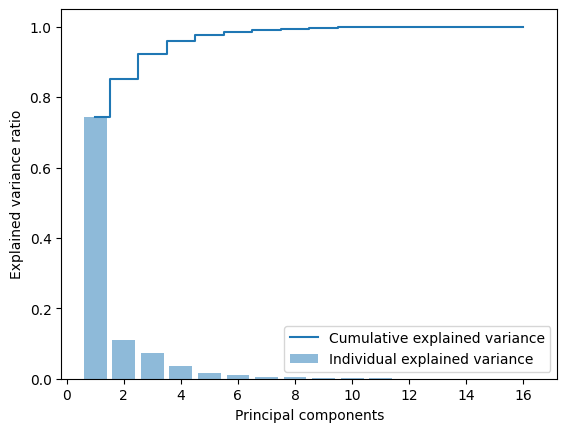

In [7]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [8]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 10
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: tren_mode_factor, satisfaction, group, complaints, communication_channel, communication_quality, training_name, purchasing_time_patterns, trainer_name, company_field
Komponen Utama 2: level_training_process, group, trainer_name, possibility_of_purchasing_the_same_training, tren_mode_factor, communication_quality, complaints, communication_channel, purchasing_time_patterns, training_name
Komponen Utama 3: satisfaction, frequency_engagement, level_training_process, tren_mode_factor, communication_channel, complaints, purchasing_time_patterns, training_name, company_field, trainer_name
Komponen Utama 4: possibility_of_purchasing_the_same_training, purchasing_time_patterns, satisfaction, frequency_engagement, level_training_process, tren_mode_factor, group, communication_quality, communication_channel, complaints
Komponen Utama 5: trainer_name, tren_mode_factor, satisfaction, level_training_process, complaints, frequency_engagement, commun

In [9]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 6


In [10]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(X, y) 

In [11]:
filterr = select.get_support()
features[filterr]

array(['level_training_process',
       'possibility_of_purchasing_the_same_training',
       'frequency_engagement', 'purchasing_time_patterns', 'group',
       'communication_channel', 'complaints', 'communication_quality',
       'tren_mode_factor', 'training_name'], dtype=object)

In [12]:
num_features_to_select = 10
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)

In [13]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 level_training_process
2 satisfaction
3 possibility_of_purchasing_the_same_training
4 frequency_engagement
5 group
6 communication_channel
7 complaints
8 communication_quality
9 tren_mode_factor
10 training_name


In [14]:
for i in columns:
    if i in df.columns:
        df2[i] = columns[i].inverse_transform(df2[i])

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_name,cross_selling
0,5.0,14.0,5.0,85.0,10.0,5.0,17.0,Aktivitas Keuangan dan Asuransi,diskon,Group,social media,positif,bagus,Ya,Ibun,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
1,5.0,15.0,5.0,88.0,10.0,5.0,17.0,Aktivitas Badan Internasional Dan Badan Ekstra...,diskon,Group,social media,positif,bagus,Ya,Reza,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
2,5.0,11.0,5.0,90.0,10.0,4.0,14.0,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",diskon,Group,social media,positif,bagus,Ya,Ibun,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
3,5.0,20.0,5.0,85.0,10.0,5.0,17.0,Konstruksi,diskon,Group,social media,positif,bagus,Ya,Reza,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
4,5.0,17.0,5.0,86.0,10.0,5.0,17.0,Informasi Dan Komunikasi,diskon,Group,social media,positif,bagus,Ya,Haris,Sales Forecasting: for Sales Target Results,Powerful Closing Technique


In [15]:
df_new = df2[selected_feature_names]
df_new["cross_selling"] = df2["cross_selling"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_3292\2945445108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["cross_selling"] = df2["cross_selling"]


,level_training_process,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,group,communication_channel,complaints,communication_quality,tren_mode_factor,training_name,cross_selling
0,5.0,5.0,85.0,10.0,Group,social media,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
1,5.0,5.0,88.0,10.0,Group,social media,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
2,5.0,5.0,90.0,10.0,Group,social media,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
3,5.0,5.0,85.0,10.0,Group,social media,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
4,5.0,5.0,86.0,10.0,Group,social media,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique


In [16]:
df_new["cross_selling"].value_counts()

Powerful Closing Technique                           626
Sales Forecasting: for Sales Target Results          626
Professional Selling Skills                          626
Marketing Research For Business Using SPSS           626
Advanced Digital Marketing & Foundation              624
Optimizing in Growing Your Business                  624
Presentation & Selling Skills Using Story-Telling    624
Social Selling: Optimizing Engagement                624
Name: cross_selling, dtype: int64